## 1. Visualising images and their respective captions.

In [4]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from textwrap import wrap

In [ ]:
imageDir = "/home/aastha/Documents/MML/lab1_MSCOCO/val2017/"
ann_file = "/home/aastha/Documents/MML/lab1_MSCOCO/annotations/captions_val2017.json"

In [ ]:
coco_cap = COCO(ann_file)

img_ids = coco_cap.getImgIds()

print(f"Total number of images: {len(img_ids)}")

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Total number of images: 5000


## first 5 images

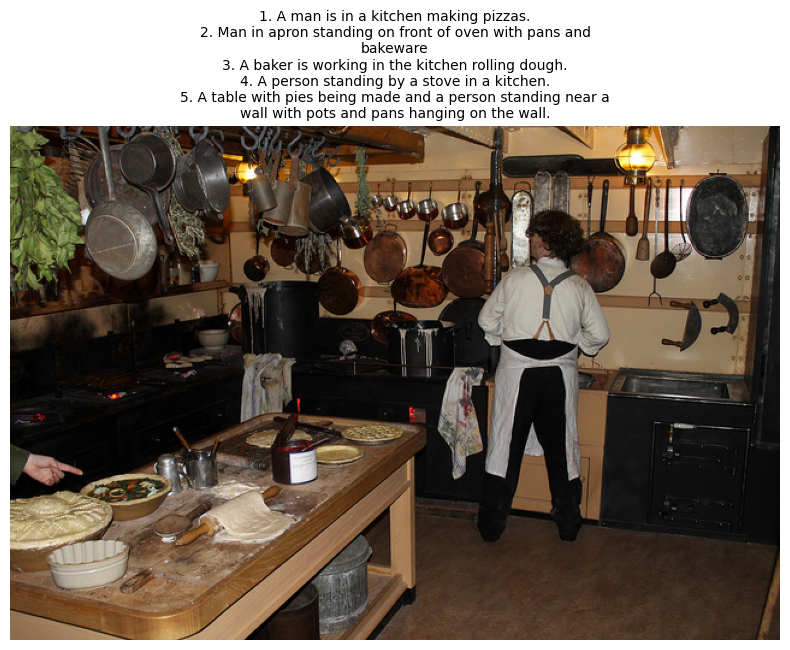

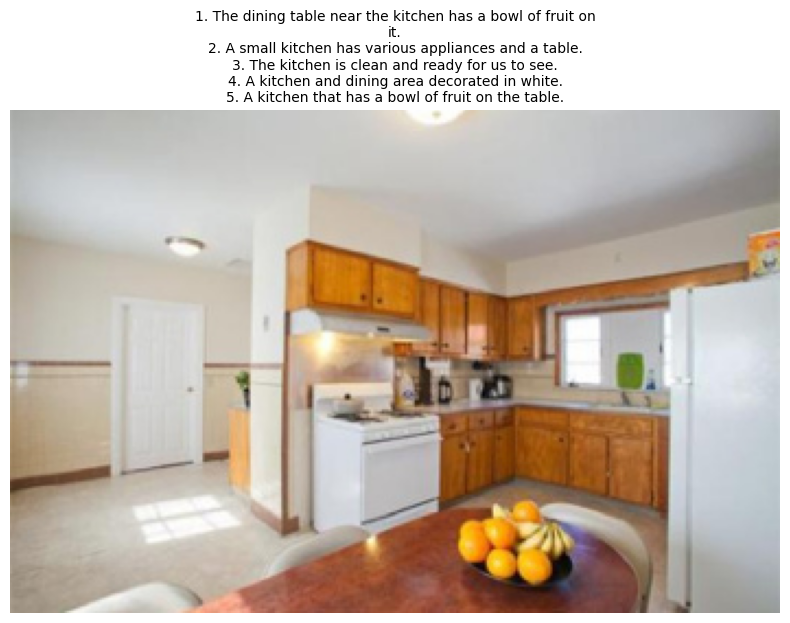

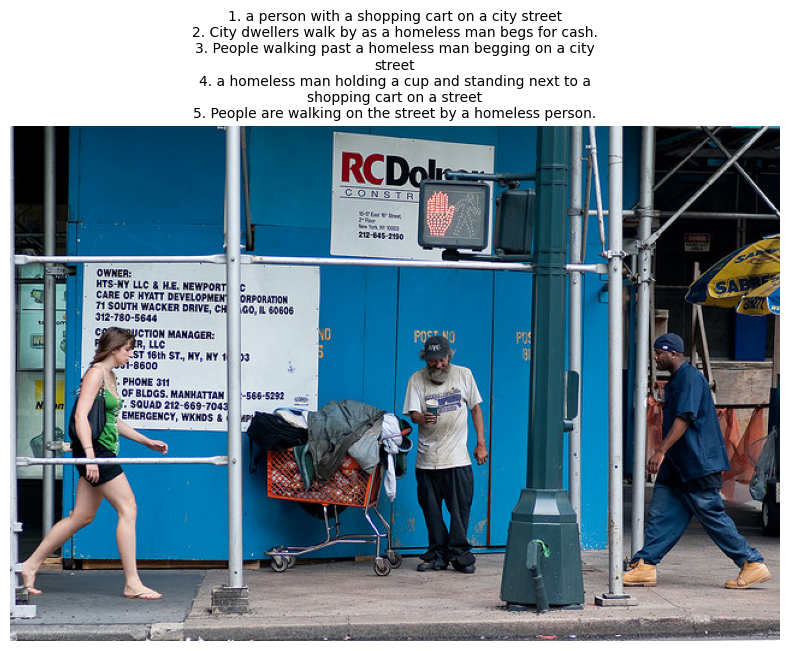

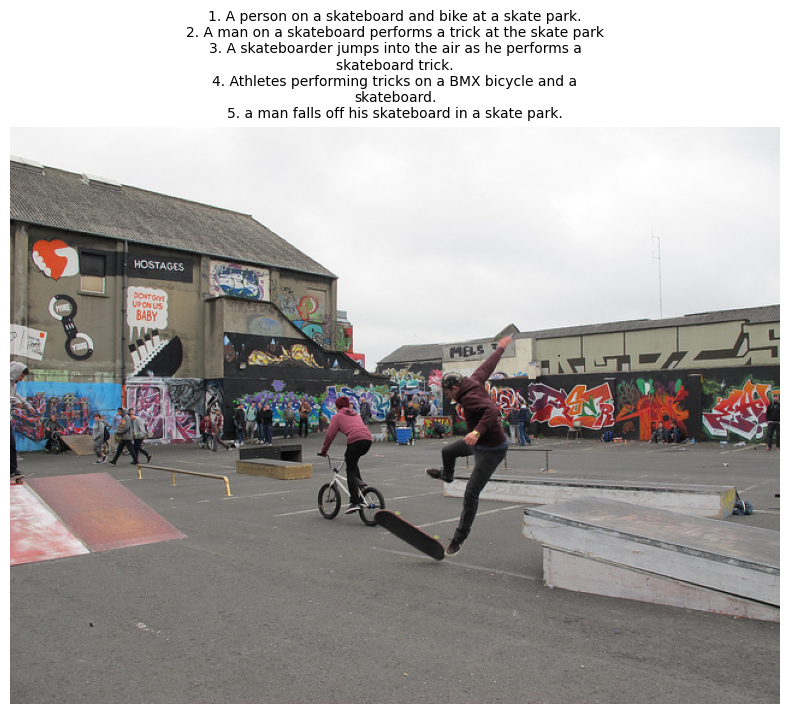

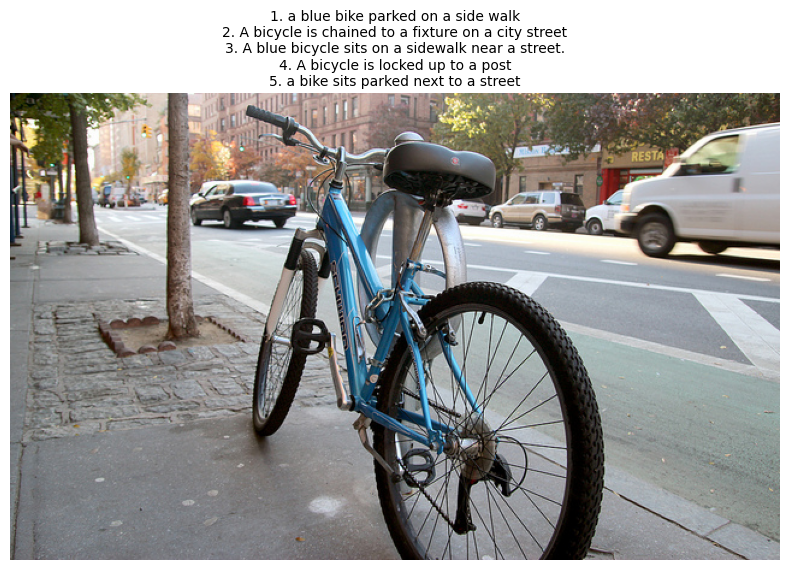

In [43]:
from textwrap import wrap
import os

image_ids = coco_cap.getImgIds()
shown = 0
idx = 0

while shown < 5 and idx < len(image_ids):
    image_id = image_ids[idx]
    image_info = coco_cap.loadImgs(image_id)[0]
    image_path = image_info['file_name']
    full_path = os.path.join(imageDir, image_path)
    if os.path.exists(full_path):
        image = plt.imread(full_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis('off')
        ann_ids = coco_cap.getAnnIds(imgIds=[image_id])
        anns = coco_cap.loadAnns(ann_ids)
        if anns:
            all_caps = [f"{i+1}. {c['caption']}" for i, c in enumerate(anns)]
            wrapped = "\n".join(["\n".join(wrap(c, 60)) for c in all_caps])
            plt.title(wrapped, fontsize=10, loc='center')
        else:
            plt.title("No captions found", fontsize=12)
        plt.tight_layout()
        plt.show()
        shown += 1
    idx += 1

## Loading an image given its ID

anns =[{'image_id': 252219, 'id': 107395, 'caption': 'a person with a shopping cart on a city street '}, {'image_id': 252219, 'id': 109132, 'caption': 'City dwellers walk by as a homeless man begs for cash.'}, {'image_id': 252219, 'id': 111433, 'caption': 'People walking past a homeless man begging on a city street'}, {'image_id': 252219, 'id': 114199, 'caption': 'a homeless man holding a cup and standing next to a shopping cart on a street'}, {'image_id': 252219, 'id': 114511, 'caption': 'People are walking on the street by a homeless person.'}]


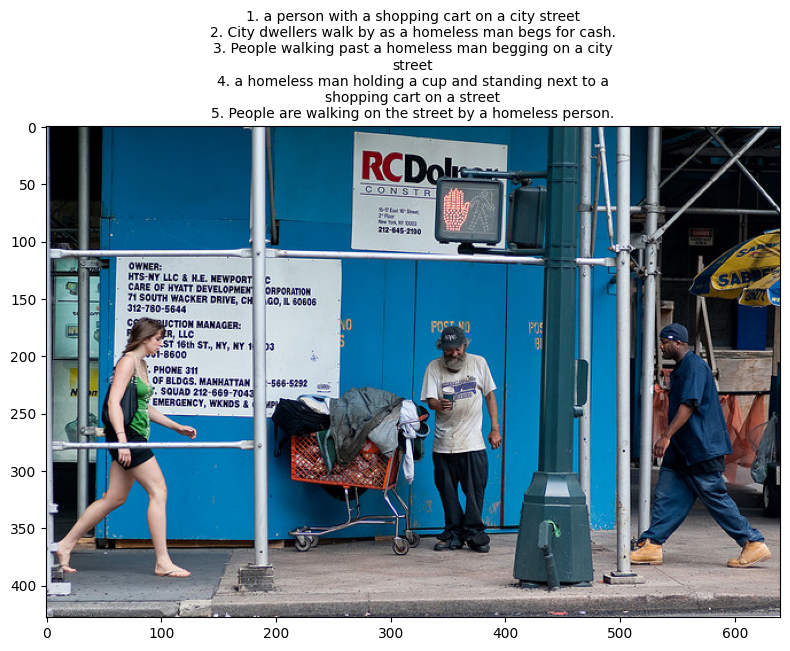

In [74]:
from textwrap import wrap
from nltk.tokenize import word_tokenize
import string
from PIL import Image
import numpy as np
import nltk

id = int(input("Enter index to view image: "))

image_ids = coco_cap.getImgIds()
image_id = image_ids[id]
image_info = coco_cap.loadImgs(image_id)[0]

ann_ids = coco_cap.getAnnIds(imgIds=[image_id])
anns = coco_cap.loadAnns(ann_ids)

print(f"{anns =}")

image_path = image_info['file_name']
image = plt.imread(imageDir + image_path)

plt.figure(figsize=(8, 8))
plt.imshow(image)
# plt.axis('off')

if anns:
    all_caps = [f"{i+1}. {c['caption']}" for i, c in enumerate(anns)]
    # wrap long lines for readability
    wrapped = "\n".join(["\n".join(wrap(c, 60)) for c in all_caps])
    plt.title(wrapped, fontsize=10, loc='center')
else:
    plt.title("No captions found", fontsize=12)

plt.tight_layout()


# 2. Preprocess the text (tokenization) and images (resizing, normalization)

Caption 107395: a person with a shopping cart on a city street 
Caption Length: 10 words
Tokens: ['a', 'person', 'with', 'a', 'shopping', 'cart', 'on', 'a', 'city', 'street']

Caption 109132: City dwellers walk by as a homeless man begs for cash.
Caption Length: 12 words
Tokens: ['city', 'dwellers', 'walk', 'by', 'as', 'a', 'homeless', 'man', 'begs', 'for', 'cash']

Caption 111433: People walking past a homeless man begging on a city street
Caption Length: 11 words
Tokens: ['people', 'walking', 'past', 'a', 'homeless', 'man', 'begging', 'on', 'a', 'city', 'street']

Caption 114199: a homeless man holding a cup and standing next to a shopping cart on a street
Caption Length: 16 words
Tokens: ['a', 'homeless', 'man', 'holding', 'a', 'cup', 'and', 'standing', 'next', 'to', 'a', 'shopping', 'cart', 'on', 'a', 'street']

Caption 114511: People are walking on the street by a homeless person.
Caption Length: 11 words
Tokens: ['people', 'are', 'walking', 'on', 'the', 'street', 'by', 'a', 'home

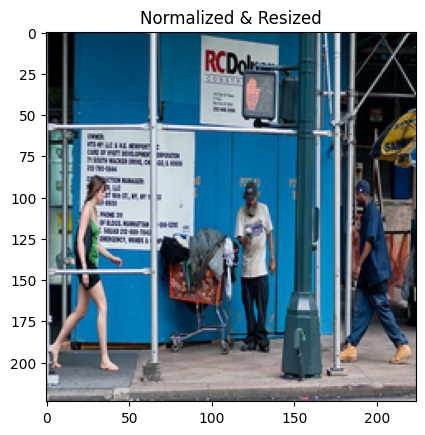

In [76]:
plt.show()

for ann in anns:
    print(f"Caption {ann['id']}: {ann['caption']}")
    print(f"Caption Length: {len(word_tokenize(ann['caption']))} words")

    raw_text = ann['caption']
    raw_text = raw_text.lower()
    raw_text = raw_text.translate(str.maketrans('', '', string.punctuation))    #removing punctuation
    tokens = word_tokenize(raw_text)
    print(f"Tokens: {tokens}\n")


target_size = (224, 224)  #example size for resNet/VGG

image_path = imageDir + image_info['file_name']

img = Image.open(image_path).convert("RGB")
img_resized = img.resize(target_size, Image.Resampling.LANCZOS)

image_array = np.array(img_resized, dtype=np.float32)/255.0

print("Resized shape:", image_array.shape)
print("Pixel range:", image_array.min(), "-", image_array.max())

plt.imshow(image_array)
# plt.axis("off")
plt.title("Normalized & Resized")
plt.show()